In [199]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.style as style
%matplotlib inline
import seaborn as sns
from scipy import stats

import warnings
warnings.filterwarnings('ignore')

plt.rc('xtick', labelsize = 10)
plt.rc('ytick', labelsize = 10)
plt.rc('axes', labelsize = 12, labelpad = 5)

Importing data and data cleaning

In [200]:
df = pd.read_csv('insurance.csv')

Looking at a sample of our data it looks like we have 4 numerical features two categorical features and 1 boolean feature.  
Our dependent variable in which we will want to predict is "charges". 

In [201]:
df.sample(5, random_state=12)

,age,sex,bmi,children,smoker,region,charges
936,44,male,29.735,2,no,northeast,32108.66282
728,18,female,40.280,0,no,northeast,2217.60120
1307,32,male,28.120,4,yes,northwest,21472.47880
924,43,male,23.200,0,no,southwest,6250.43500
137,22,male,25.175,0,no,northwest,2045.68525


First checking data consistency and format

In [202]:
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [203]:
df['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [204]:
df['sex'].unique()

array(['female', 'male'], dtype=object)

In [205]:
df['children'].unique()

array([0, 1, 3, 2, 5, 4])

It looks like our "sex" and "region" features only have a few unique values, we can convert these columns to categorical datatypes for easier analysis. Our 'children' column also only ranges from 1 to 5 so we can treat this as a categorial feature as well.

In [206]:
for col in ['region', 'sex', 'children', 'smoker']:
    df[col] = df[col].astype('category')

In [207]:
df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

No null values in this dataset so we don't need to worry about imputation

## EDA

Let's begin our EDA by first analyzing our numerical features, age and bmi

#### Age

In [208]:
df['age'].describe()

count    1338.000000
mean       39.207025
std        14.049960
min        18.000000
25%        27.000000
50%        39.000000
75%        51.000000
max        64.000000
Name: age, dtype: float64

Text(0.5, 1.0, 'Q-Q plot')

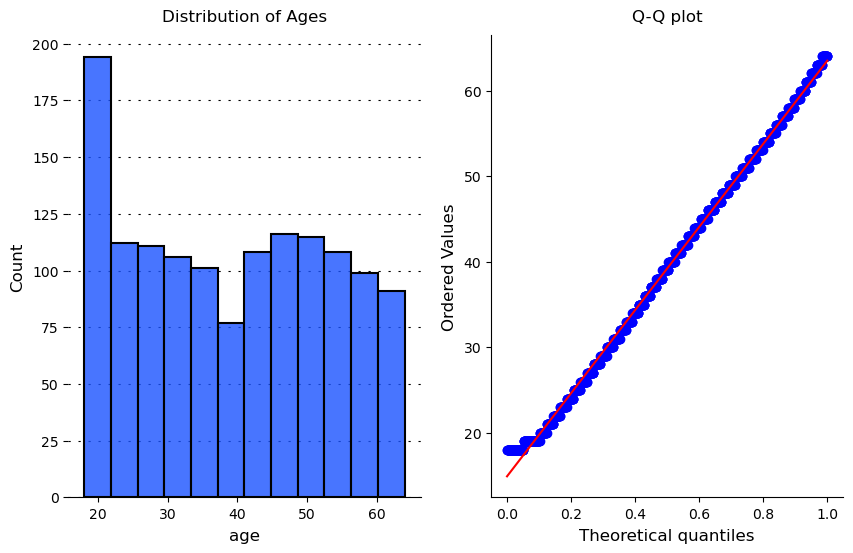

In [209]:
fig = plt.figure(figsize = (10,6), facecolor='white')
gs = fig.add_gridspec(1,2)
ax = [None for i in range(2)]
ax[0] = fig.add_subplot(gs[0,0])
ax[1] = fig.add_subplot(gs[0,1])

sns.histplot(
    data = df,
    x = 'age',
    ax = ax[0],
    edgecolor = 'black',
    linewidth = 1.5,
    alpha = 0.8,
    zorder = 2,
    color = ['#1a53ff']
)

stats.probplot(df['age'], dist = 'uniform', plot = ax[1])

ax[0].grid(
    which = 'both',
    axis = 'y',
    zorder = 1,
    color = 'black',
    linestyle = '-',
    dashes = (2,7)
)

for direction in ['top', 'left', 'right']:
    ax[0].spines[direction].set_visible(False)

for direction in ['top', 'right']:
    ax[1].spines[direction].set_visible(False)

ax[0].set_title('Distribution of Ages', pad = 10)
ax[1].set_title('Q-Q plot', pad = 10)


Our age distribution is relatively uniform and non-normal, we have a peak around 20 years old and a mean age of ~40  
A quantile-quantile plot of our age distribution shows that this data behaves very similarly to uniformally distributed data.

Text(0.5, 0, 'Age')

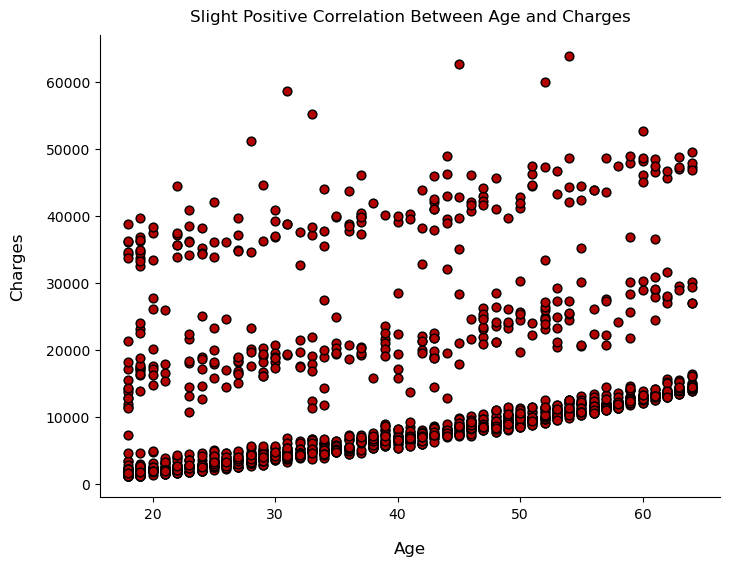

In [210]:
fig = plt.figure(figsize = (8,6))

ax = sns.scatterplot(
    x = df['age'],
    y = df['charges'],
    s = 40,
    edgecolor = 'black',
    linewidth = 1,
    c = ['#b30000']
)

for direction in ['top', 'right']:
    ax.spines[direction].set_visible(False)

ax.set_title('Slight Positive Correlation Between Age and Charges', pad = 10)
ax.set_ylabel('Charges', labelpad = 15)
ax.set_xlabel('Age', labelpad = 15)

### BMI

In [211]:
df['bmi'].describe()

count    1338.000000
mean       30.663397
std         6.098187
min        15.960000
25%        26.296250
50%        30.400000
75%        34.693750
max        53.130000
Name: bmi, dtype: float64

Text(0.5, 1.0, 'Q-Q plot')

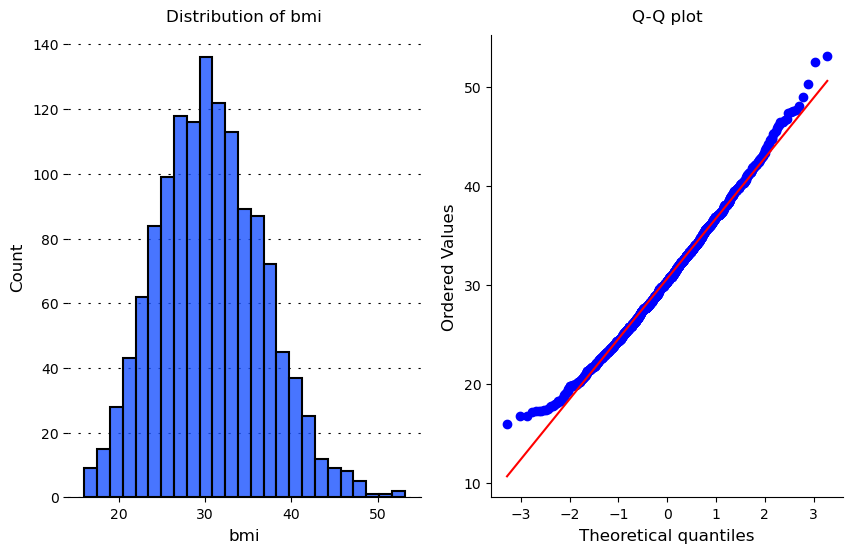

In [212]:
fig = plt.figure(figsize = (10,6), facecolor='white')
gs = fig.add_gridspec(1,2)
ax = [None for i in range(2)]
ax[0] = fig.add_subplot(gs[0,0])
ax[1] = fig.add_subplot(gs[0,1])

sns.histplot(
    data = df,
    x = 'bmi',
    ax = ax[0],
    edgecolor = 'black',
    linewidth = 1.5,
    alpha = 0.8,
    zorder = 2,
    color = ['#1a53ff']
)

stats.probplot(df['bmi'], dist = 'norm', plot = ax[1])

ax[0].grid(
    which = 'both',
    axis = 'y',
    zorder = 1,
    color = 'black',
    linestyle = '-',
    dashes = (2,7)
)

for direction in ['top', 'left', 'right']:
    ax[0].spines[direction].set_visible(False)

for direction in ['top', 'right']:
    ax[1].spines[direction].set_visible(False)

ax[0].set_title('Distribution of bmi', pad = 10)
ax[1].set_title('Q-Q plot', pad = 10)

We observe that our bmi feature is much more normally distributed, with a slight right skew.  
We have an average bmi of 30 and a slight deviation from a normal distribution at the tails.

In [213]:
transformed_bmi, lambda_bmi = stats.boxcox(df['bmi'])

In [214]:
print('box-cox lambda value:', lambda_bmi)

box-cox lambda value: 0.46059764800652364


Text(0.5, 0, 'BMI (transformed)')

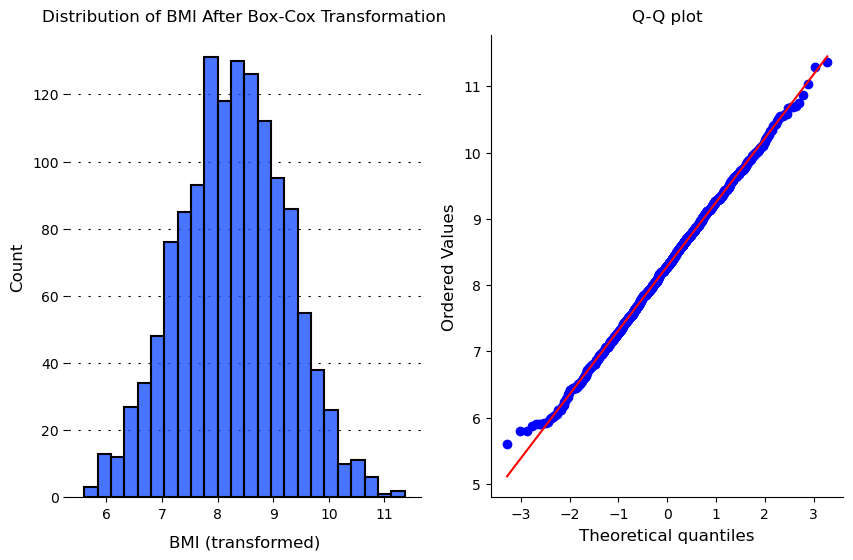

In [235]:
fig = plt.figure(figsize = (10,6), facecolor='white')
gs = fig.add_gridspec(1,2)
ax = [None for i in range(2)]
ax[0] = fig.add_subplot(gs[0,0])
ax[1] = fig.add_subplot(gs[0,1])

sns.histplot(
    x = transformed_bmi,
    ax = ax[0],
    edgecolor = 'black',
    linewidth = 1.5,
    alpha = 0.8,
    zorder = 2,
    color = ['#1a53ff']
)

stats.probplot(transformed_bmi, dist = 'norm', plot = ax[1])

ax[0].grid(
    which = 'both',
    axis = 'y',
    zorder = 1,
    color = 'black',
    linestyle = '-',
    dashes = (2,7)
)

for direction in ['top', 'left', 'right']:
    ax[0].spines[direction].set_visible(False)

for direction in ['top', 'right']:
    ax[1].spines[direction].set_visible(False)

ax[0].set_title('Distribution of BMI After Box-Cox Transformation', pad = 10)
ax[1].set_title('Q-Q plot', pad = 10)

ax[0].set_xlabel('BMI (transformed)', labelpad = 10)

After our Box-Cox transformation the distribution of our BMI values is much more normalized.  
We may want to include this tranformation when building our linear model

In [216]:
df['bmi_transformed'] = df['bmi']**lambda_bmi

In [217]:
df.head()

,age,sex,bmi,children,smoker,region,charges,bmi_transformed
0,19,female,27.900,0,yes,southwest,16884.92400,4.632782
1,18,male,33.770,1,no,southeast,1725.55230,5.058687
2,28,male,33.000,3,no,southeast,4449.46200,5.005229
3,33,male,22.705,0,no,northwest,21984.47061,4.213339
4,32,male,28.880,0,no,northwest,3866.85520,4.707037


Text(0.5, 0, 'BMI')

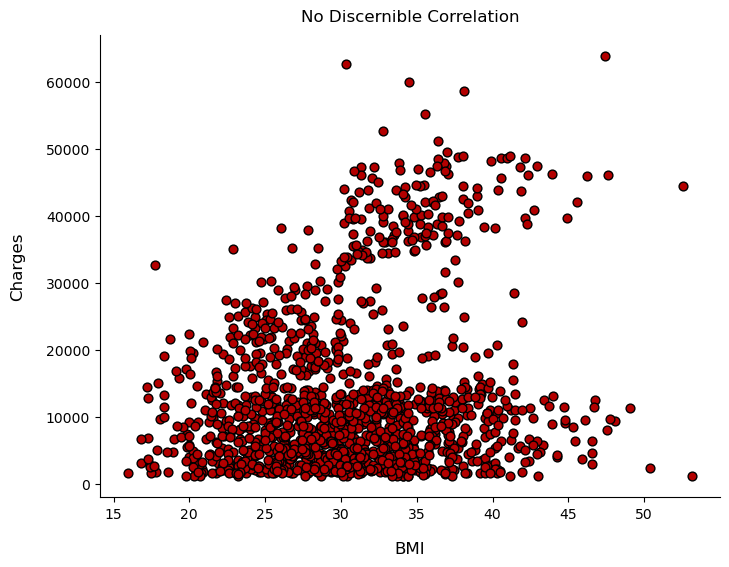

In [244]:
fig = plt.figure(figsize = (8,6))

ax = sns.scatterplot(
    x = df['bmi'],
    y = df['charges'],
    s = 40,
    edgecolor = 'black',
    linewidth = 1,
    c = ['#b30000']
)

for direction in ['top', 'right']:
    ax.spines[direction].set_visible(False)

ax.set_title('No Discernible Correlation', pad = 10)
ax.set_ylabel('Charges', labelpad = 15)
ax.set_xlabel('BMI', labelpad = 15)


There doesn't seem to be an obvious correlation between BMI and charges.  
However we can make out some clusters in our data, lets add in some of our other features.  
Smoking typically comes with negative impacts on health (possible higher charges). Lets include this in our graph

Text(0.5, 0, 'BMI')

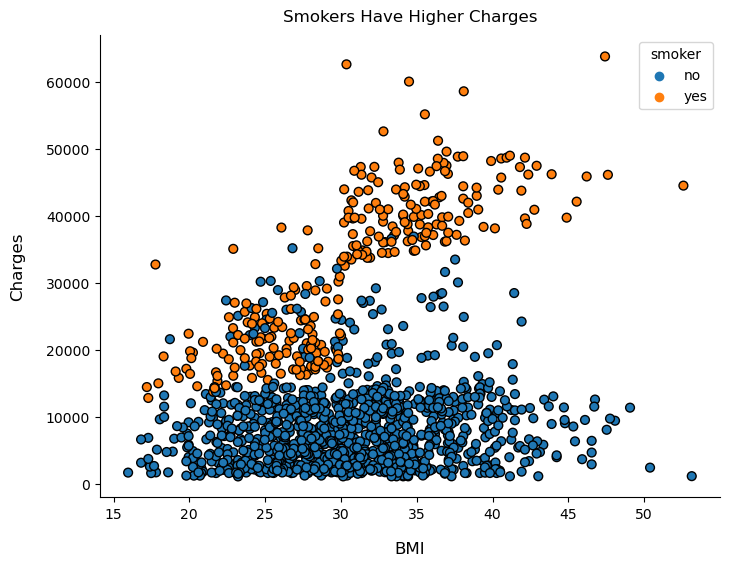

In [249]:
fig = plt.figure(figsize = (8,6))

ax = sns.scatterplot(
    x = df['bmi'],
    y = df['charges'],
    s = 40,
    edgecolor = 'black',
    linewidth = 1,
    hue = df['smoker']
)

for direction in ['top', 'right']:
    ax.spines[direction].set_visible(False)

ax.set_title('Smokers Have Higher Charges', pad = 10)
ax.set_ylabel('Charges', labelpad = 15)
ax.set_xlabel('BMI', labelpad = 15)

We can observe that smoking seems to correlate with higher charges. We can also observe possible interaction terms between smoking and BMI

#### Sex

In [218]:
df['sex'].value_counts()

male      676
female    662
Name: sex, dtype: int64

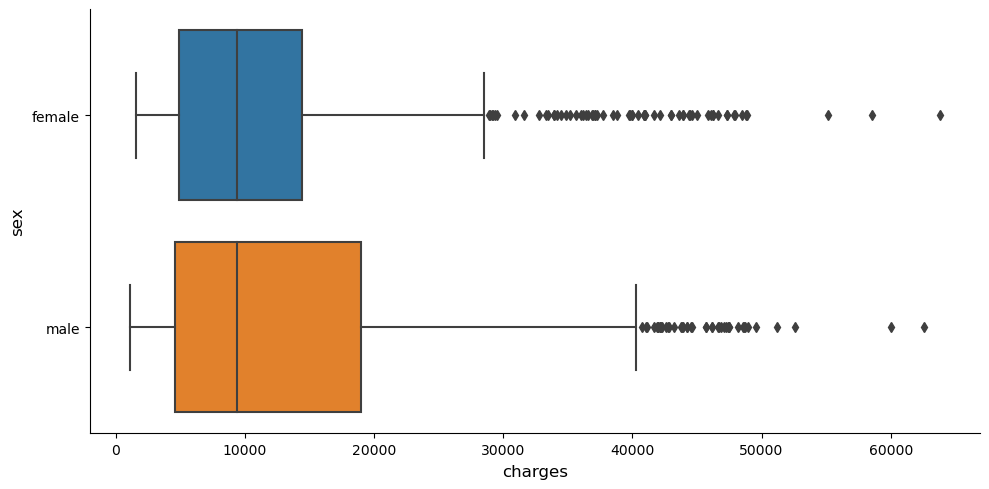

In [219]:
sns.catplot(
    data = df,
    y = 'sex',
    x = 'charges',
    kind = 'box',
    height = 5,
    aspect = 2
)

<AxesSubplot:xlabel='age', ylabel='charges'>

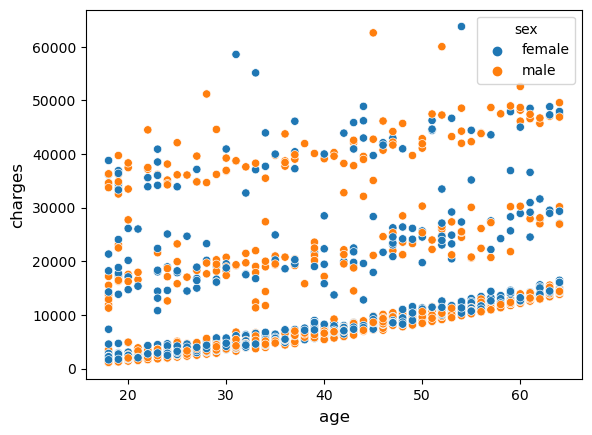

In [220]:
sns.scatterplot(
    x = df['age'],
    y = df['charges'],
    hue = df['sex']
)

<AxesSubplot:xlabel='bmi', ylabel='charges'>

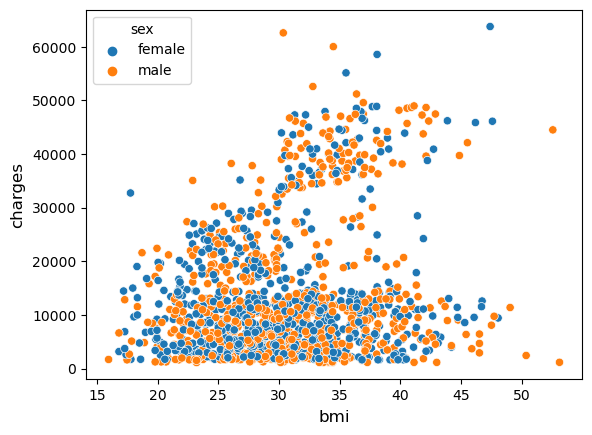

In [221]:
sns.scatterplot(
    x = df['bmi'],
    y = df['charges'],
    hue = df['sex']
)

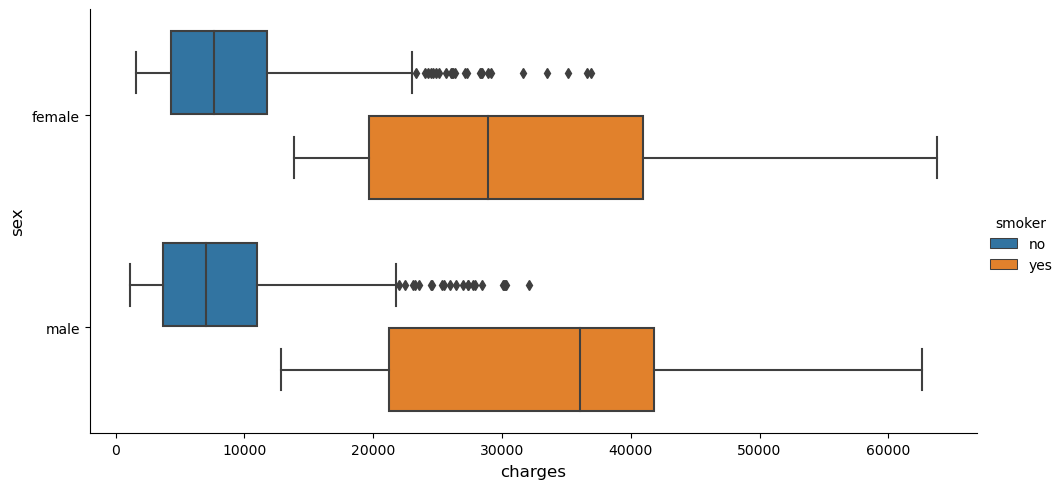

In [222]:
sns.catplot(
    data = df,
    y = 'sex',
    x = 'charges',
    kind = 'box',
    height = 5,
    aspect = 2,
    hue = 'smoker'
)

#### BMI

In [223]:
df['bmi'].describe()

count    1338.000000
mean       30.663397
std         6.098187
min        15.960000
25%        26.296250
50%        30.400000
75%        34.693750
max        53.130000
Name: bmi, dtype: float64

<AxesSubplot:xlabel='bmi', ylabel='Count'>

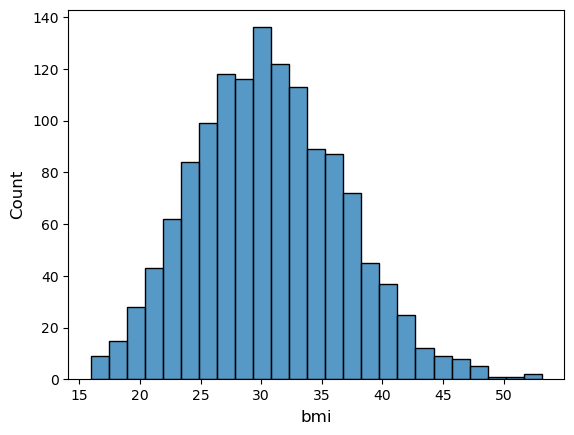

In [224]:
sns.histplot(
    data = df,
    x = 'bmi'
)

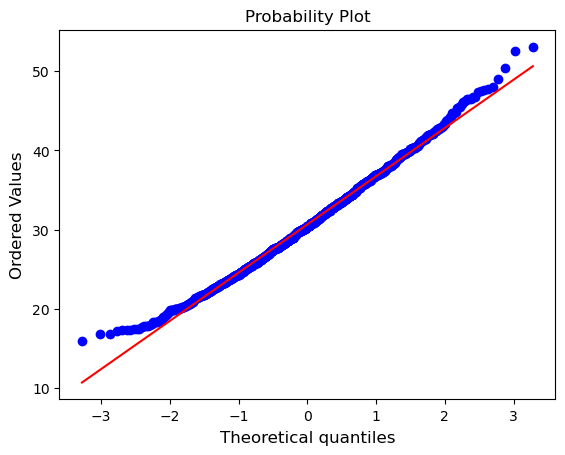

In [225]:
stats.probplot(x = df['bmi'], dist = 'norm', plot = plt)
plt.show()

<AxesSubplot:xlabel='bmi', ylabel='charges'>

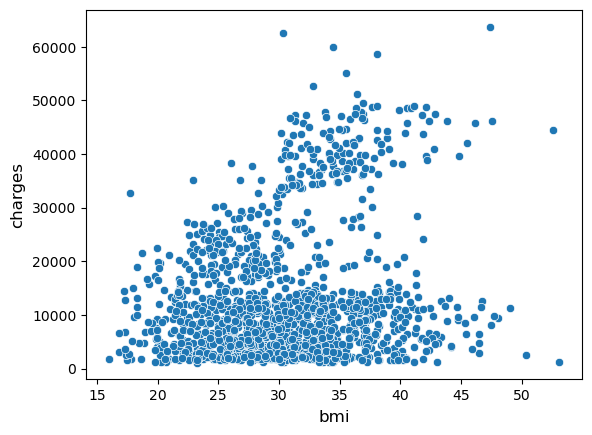

In [226]:
sns.scatterplot(
    data = df,
    x = 'bmi',
    y = 'charges'
)

#### Children

In [227]:
df['children'].describe()

count     1338
unique       6
top          0
freq       574
Name: children, dtype: int64

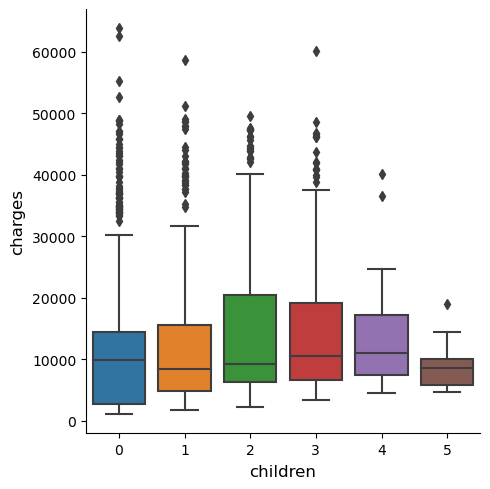

In [228]:
sns.catplot(
    data = df,
    x = 'children',
    y = 'charges',
    kind = 'box'
)

smoker,no,yes
children,,
0,7611.793335,31341.363954
1,8303.109350,31822.654334
2,9493.093674,33844.235755
3,9614.519391,32724.915268
4,12121.344408,26532.276933
5,8183.845556,19023.260000


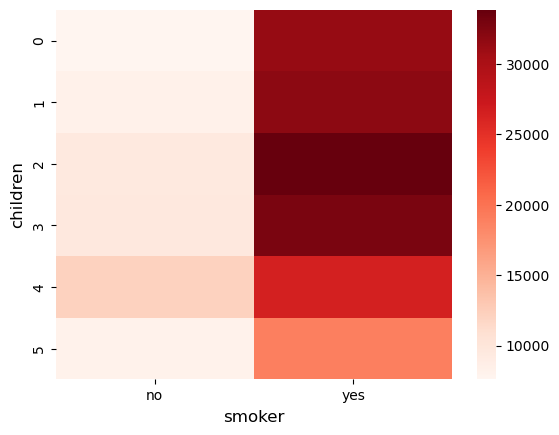

In [229]:
# contingency_table = pd.crosstab(df['children'], df['smoker'], normalize = 'columns') * 100
pivot = df.pivot_table(values = 'charges', index = 'children', columns = 'smoker')

ax = sns.heatmap(data = pivot, cmap = 'Reds')

pivot

#### Smoker

In [230]:
df['smoker'].unique()

['yes', 'no']
Categories (2, object): ['no', 'yes']

<AxesSubplot:xlabel='charges', ylabel='smoker'>

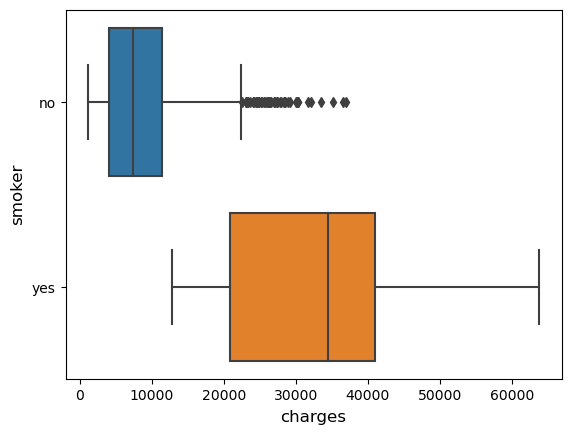

In [231]:
sns.boxplot(
    data = df,
    x = 'charges',
    y = 'smoker'
)

we can see that charges and our smoker variable have a high correlation with eachother

## Building Linear Model

In [232]:
import statsmodels.formula.api as smf

In [233]:
df.he

AttributeError: 'DataFrame' object has no attribute 'he'

In [ ]:
model = smf.ols(formula  = 'charges ~ age + C(sex) + bmi + C(children) + C(smoker) + C(region)', data = df).fit()

In [ ]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.752
Model:                            OLS   Adj. R-squared:                  0.750
Method:                 Least Squares   F-statistic:                     334.7
Date:                Tue, 31 Jan 2023   Prob (F-statistic):               0.00
Time:                        09:41:25   Log-Likelihood:                -13545.
No. Observations:                1338   AIC:                         2.712e+04
Df Residuals:                    1325   BIC:                         2.718e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept              -1.19

It appears that all variables are statistically significant (p > 0.05) except for our sex feature and possibly region feature. This initial linear model explains over 76% of the total variablility of our 'charges' variable.

Box-Cox Transformation of 'charges'

In [ ]:
tranfomred_charges, lambda_charges = stats.boxcox(df['charges'])

In [ ]:
tranfomred_charges

array([12.12897974,  8.80859638, 10.14752106, ...,  8.72968299,
        9.01913128, 12.9736611 ])

In [ ]:
lamb = lambda_charges
lamb

0.043649053770664956

this gives us a transformation of X**(0.043)

<AxesSubplot:xlabel='charges', ylabel='Count'>

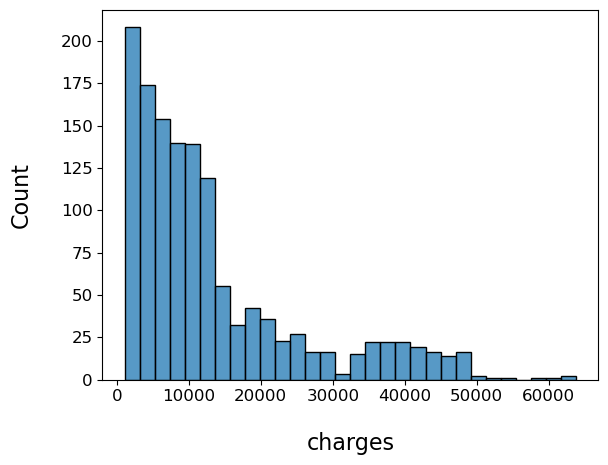

In [ ]:
sns.histplot(
    x = df['charges']
)

<AxesSubplot:xlabel='charges', ylabel='Count'>

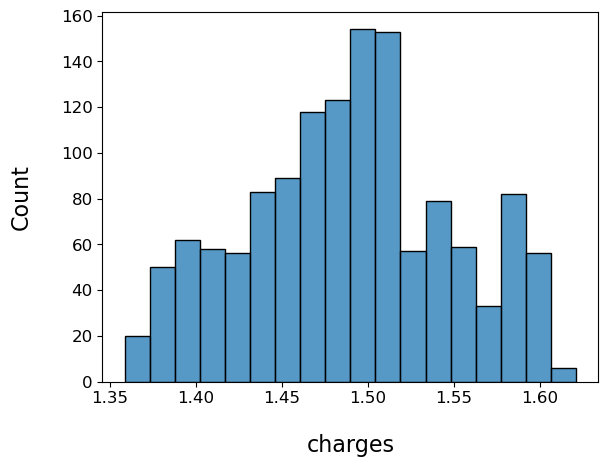

In [ ]:
sns.histplot(
    x = df['charges']**lamb
)

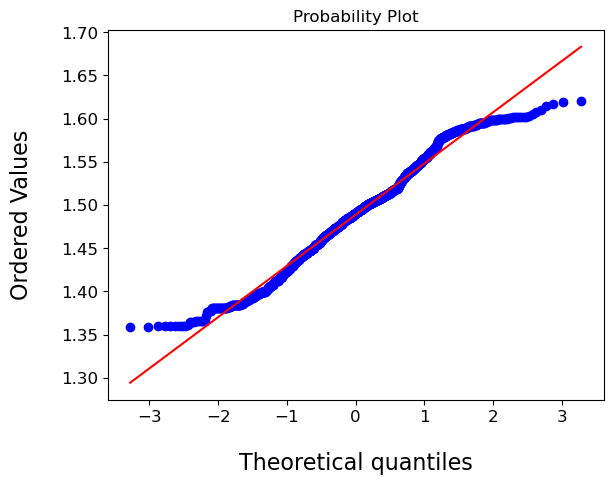

In [ ]:
stats.probplot(x = df['charges']**lamb, dist = 'norm', plot = plt)
plt.show()

In [ ]:
model_2 = smf.ols(formula = 'I(charges**0.0436) ~ age + C(sex) + bmi + C(children) + C(smoker) + C(region)', data = df).fit()

In [ ]:
print(model_2.summary())

                             OLS Regression Results                             
Dep. Variable:     I(charges ** 0.0436)   R-squared:                       0.773
Model:                              OLS   Adj. R-squared:                  0.771
Method:                   Least Squares   F-statistic:                     376.2
Date:                  Tue, 31 Jan 2023   Prob (F-statistic):               0.00
Time:                          09:41:26   Log-Likelihood:                 2868.4
No. Observations:                  1338   AIC:                            -5711.
Df Residuals:                      1325   BIC:                            -5643.
Df Model:                            12                                         
Covariance Type:              nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercep

<AxesSubplot:xlabel='age', ylabel='charges'>

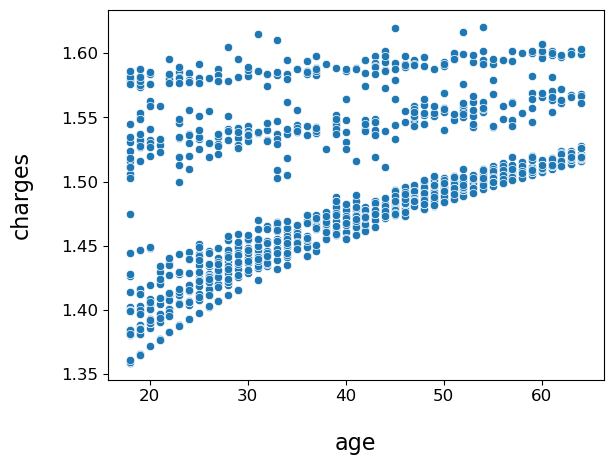

In [ ]:
sns.scatterplot(
    x = df['age'],
    y = df['charges']**lamb
)

Age, BMI, and smoker likely have interaction effects

<AxesSubplot:xlabel='age', ylabel='charges'>

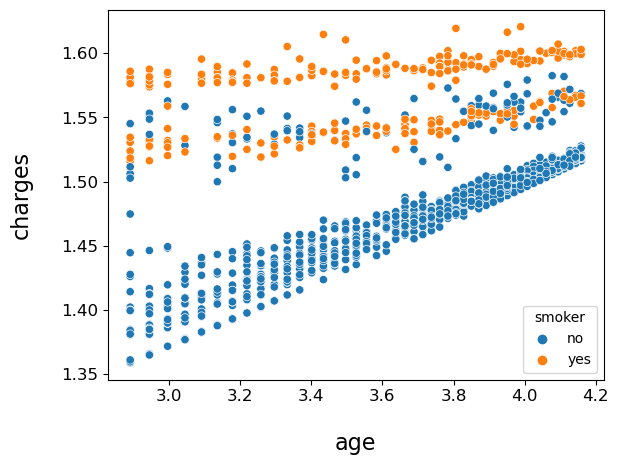

In [ ]:
sns.scatterplot(
    x = np.log(df['age']),
    y = df['charges']**lamb,
    hue = df['smoker']
)

<AxesSubplot:xlabel='bmi', ylabel='charges'>

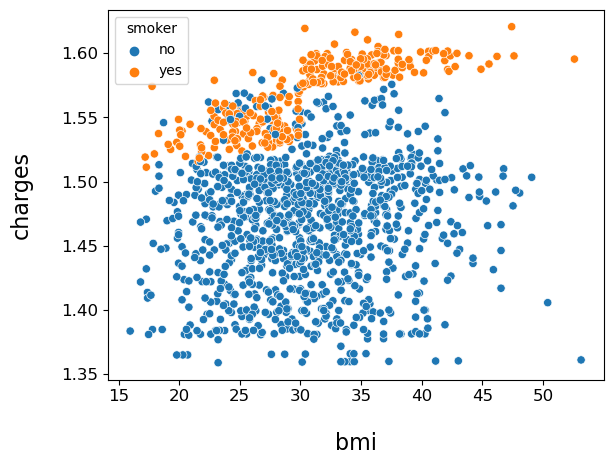

In [ ]:
sns.scatterplot(
    x = df['bmi'],
    y = df['charges']**lamb,
    hue = df['smoker']
)

In [ ]:
model_3 = smf.ols(formula = 'I(charges**0.0436) ~ age * C(smoker) + C(sex) + bmi * C(smoker) + C(children) + C(smoker) + C(region)', data = df).fit()

In [ ]:
print(model_3.summary())

                             OLS Regression Results                             
Dep. Variable:     I(charges ** 0.0436)   R-squared:                       0.828
Model:                              OLS   Adj. R-squared:                  0.827
Method:                   Least Squares   F-statistic:                     456.5
Date:                  Tue, 31 Jan 2023   Prob (F-statistic):               0.00
Time:                          09:41:26   Log-Likelihood:                 3055.7
No. Observations:                  1338   AIC:                            -6081.
Df Residuals:                      1323   BIC:                            -6003.
Df Model:                            14                                         
Covariance Type:              nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercep